<a href="https://colab.research.google.com/github/stutkhd/excercise_logistics/blob/master/GRASP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 第8, 9, 10回. コンペティション用プログラム作成

## 1. 都市集合C
### 1.1 ベンチマーク問題例TSPLIBを使う場合

## GRASPとは
以下のステップを反復し、この過程で得られた最良の解を出力する方法  
1.ランダム化欲張り法により初期解xを生成する  
2.解xを局所探索法により改善する  

----
### ランダム化欲張り法とは
欲張り法の各ステップでは、目的関数への貢献度が最も高いものを選択しつつ解を構成していくが、ランダム化欲張り法では、貢献度の高いものから順にいくつかを候補として持ちそれらの中からランダムに１つ選択する  
##### 目的関数への貢献度とは
各ステップで今いるところから最も近いところを訪問した  
この最も近いところが貢献度が高い場所を指す

In [33]:
def strnum_to_num(t):
    num=t.split("e+")
    r=float(num[0])
    if len(num)==2:
        r *= 10**int(num[1])
    return r

def read_tsp_file(instance):
    if instance[:4]=="http":
        import urllib.request
        with urllib.request.urlopen(instance) as f:
            with open('tmp.txt', 'w') as g:
                print(f.read().decode(), file=g)
                instance="tmp.txt"
        
    with open(instance,"r") as f:
        for i in range(6):
            line=f.readline().rstrip("\n")        
        C={}
        for line in f.readlines():
            node=line.rstrip("\n").split()
            name=node[0]            
            if name == "EOF":
                break
            if node[0]=='NODE_COORD_SECTION':
                continue
            x,y=strnum_to_num(node[1]),strnum_to_num(node[2])
            C[name]=(x,y)
        return C
    
instance="http://elib.zib.de/pub/mp-testdata/tsp/tsplib/tsp/ch130.tsp"
C=read_tsp_file(instance)

In [34]:
C

{'1': (334.5909245845, 161.7809319139),
 '10': (683.2674131973, 414.2096286906),
 '100': (264.355471781, 377.5743377274),
 '101': (51.6826916855, 676.0429509187),
 '102': (692.13768493, 543.8010925819),
 '103': (169.21913568, 547.8194325476),
 '104': (194.0131482339, 263.4791316822),
 '105': (415.1928395332, 78.9133571973),
 '106': (415.0432204919, 479.0801701569),
 '107': (169.8389859939, 245.6103433244),
 '108': (525.0987124228, 213.5063718969),
 '109': (238.6851191283, 33.4932910965),
 '11': (280.7494438748, 5.9206392047),
 '110': (116.2112467718, 363.574270294),
 '111': (16.9283258126, 656.5711014044),
 '112': (434.3440768162, 92.6996831431),
 '113': (40.5253860363, 424.6829615797),
 '114': (530.4849979086, 183.8390534273),
 '115': (484.359584899, 49.2460387276),
 '116': (263.6501248722, 426.5852608187),
 '117': (450.2891917862, 126.3853415784),
 '118': (441.7822805823, 299.7724362653),
 '119': (24.2169105375, 500.3474481664),
 '12': (252.749309008, 535.7430385019),
 '120': (503.78

### 1.2 ランダムなデータを使う場合

In [38]:
C={}
n=100
R=10000

import random
for i in range(n):
    x=random.randint(0,R)
    y=random.randint(0,R)
    C[i]=(x,y)

## 2. distanceとgraph_of_tourの定義

In [39]:
def distance(pa,pb):
    return ((pa[0]-pb[0])**2 + (pa[1]-pb[1])**2)**0.5

import networkx as nx

def graph_of_tour(tour):
    Gt=nx.Graph()

    for i in range(len(tour)):
        ci=tour[i]
        if i == len(tour)-1:
            cj=tour[0]
        else:
            cj=tour[i+1]        
        Gt.add_edge(ci,cj,weight=distance(C[ci],C[cj]))
    return Gt

## 3. アルゴリズム

提出してもらったみなさんのプログラムはtsp_solveから実行します．制限時間で止まるようしておいてください．

In [ ]:
import time

# start = random.randint(0,n)

def decide_u(v, visited, G):
    max = 10**8
    d = []
    for u in G[v]:
        if u not in visited:
            d.append(G[v][u]["weight"])
        else:
            d.append(max)
    # index合わせるために現在いる都市にマックスを追加
    d.insert(v, max)
    sort_d = sorted(d)[:3]
    choice = sort_d[random.randint(0,2)]
    u = d.index(choice)
    return u

def random_neighbor(G):
    start = 0
    tour = [start]
    visited = {start:True}
    while len(tour) < len(C):
        v = tour[-1]
        random_min_u = decide_u(v, visited, G)
        if random_min_u not in visited:
            visited[random_min_u] = True
            tour.append(random_min_u)
    return tour

def better_solution(sol):
    n = len(sol) #都市の数
    # print(sol)
    #反転させる
    for i in range(n):
        for length in range(2, n):
            #一番最後はいらないので削除
            if i+length-1 > n-1:
                break
            path = sol[i:i+length] #reverseしたいpath
            diff = -distance(C[sol[i-1]], C[sol[i]]) - distance(C[sol[i+length-1]], C[sol[(i+length)%n]])+distance(C[sol[i-1]], C[sol[i+length-1]])+ distance(C[sol[i]], C[sol[(i+length)%n]])
            if diff < -0.0000001: #数値誤差の関係で0ではない
                path.reverse()
                bsol = sol[:i] + path + sol[i+length:]
                return bsol
    return None

def local_search(init_sol):
    sol = init_sol #現在の解を表す
    #近傍を見て改善解があれば改善する
    while True:
        bsol = better_solution(sol) #改善する
        if bsol == None:
            return sol
        else:
            sol = bsol

    return None

def tsp_solve(C,timelimit=500):
    ''' TSPを解くためのプログラム
    input: 都市集合C, 制限時間timelimit(秒)
    output: 巡回路
    '''
    pre_tour = [i for i in C]

    #全結合のグラフ
    G = nx.Graph()
    for v in C:
        G.add_node(v)
    for i, ci in enumerate(C):
        for j, cj in enumerate(C):
            if i < j:
                G.add_edge(ci,cj, weight=distance(C[ci], C[cj]))

    min_tour_size = graph_of_tour(pre_tour).size(weight="weight")
    ans_tour = pre_tour
    starttime=time.time()
    while time.time() - starttime < timelimit:
        tour = random_neighbor(G)
        ans_tour = local_search(tour)
        if graph_of_tour(ans_tour).size(weight="weight") < min_tour_size:
            min_tour_size = graph_of_tour(ans_tour).size(weight="weight")
            print("min_tour_size:,",min_tour_size, ans_tour)
    return ans_tour

tour=tsp_solve(C,500)

min_tour_size:, 87844.30381353416 [79, 47, 43, 37, 18, 30, 42, 60, 24, 56, 95, 16, 54, 77, 53, 82, 83, 0, 81, 93, 19, 50, 74, 89, 4, 67, 76, 78, 38, 51, 85, 1, 61, 65, 23, 59, 35, 96, 21, 90, 6, 11, 48, 71, 13, 41, 88, 17, 87, 25, 68, 5, 97, 40, 70, 20, 44, 72, 7, 55, 99, 66, 64, 75, 80, 2, 98, 27, 15, 94, 3, 10, 57, 14, 33, 22, 8, 92, 9, 46, 86, 49, 58, 45, 36, 84, 91, 62, 39, 28, 12, 34, 29, 52, 26, 32, 69, 63, 31, 73]
min_tour_size:, 84062.64977386183 [56, 24, 73, 31, 69, 32, 63, 26, 52, 29, 34, 12, 28, 91, 62, 39, 98, 2, 80, 75, 27, 15, 94, 3, 66, 64, 99, 55, 7, 8, 72, 88, 17, 87, 41, 13, 71, 48, 11, 90, 6, 68, 25, 44, 92, 9, 22, 33, 14, 57, 10, 84, 36, 45, 58, 49, 43, 47, 79, 37, 18, 30, 60, 42, 16, 0, 81, 83, 82, 93, 38, 51, 70, 86, 46, 20, 40, 5, 97, 65, 21, 96, 23, 35, 59, 1, 61, 85, 78, 76, 67, 4, 89, 74, 19, 50, 53, 77, 54, 95]
min_tour_size:, 83964.2055678191 [89, 74, 50, 19, 82, 53, 77, 95, 56, 54, 16, 42, 60, 30, 83, 0, 81, 38, 51, 70, 18, 37, 43, 47, 79, 24, 73, 31, 63, 6

KeyboardInterrupt: ignored

In [ ]:
pre_tour = [i for i in C]
G = nx.Graph()
for v in C:
    G.add_node(v)
for i, ci in enumerate(C):
    for j, cj in enumerate(C):
        if i < j:
            G.add_edge(ci,cj, weight=distance(C[ci], C[cj]))
G.size

In [34]:
print(graph_of_tour(pre_tour).size(weight="weight"))

57614.569009537605


## 4. 解tourの描画と実行可能性

size of tour: 84316.32317685429
feasibility: True


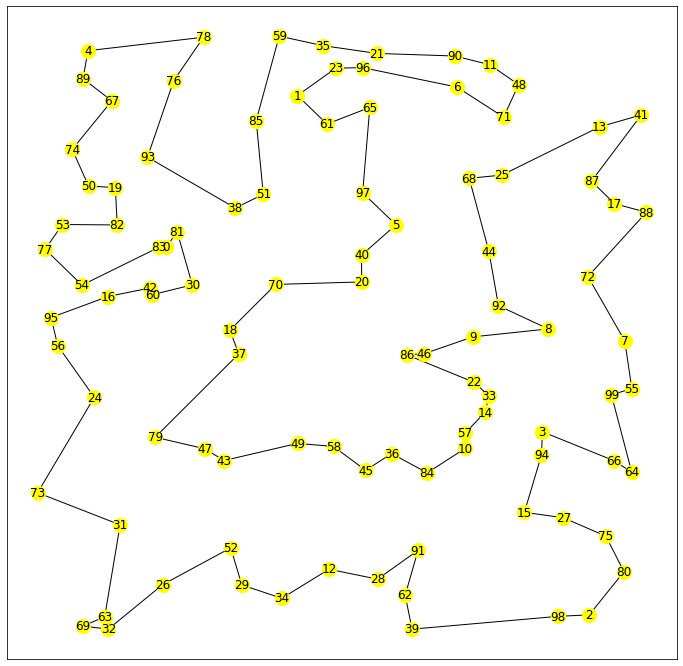

In [51]:
Gt=graph_of_tour(tour)
print('size of tour:', Gt.size(weight='weight'))
print('feasibility:',nx.is_k_edge_connected(Gt,2))

import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))
nx.draw_networkx(Gt,pos=C,node_color="yellow",node_size=200,with_labels=True,edge_color="k",width=1,axis="equal")
plt.show() 

In [ ]:
C={}
n=10
R=10000

import random
for i in range(n):
    x=random.randint(0,R)
    y=random.randint(0,R)
    C[i]=(x,y)


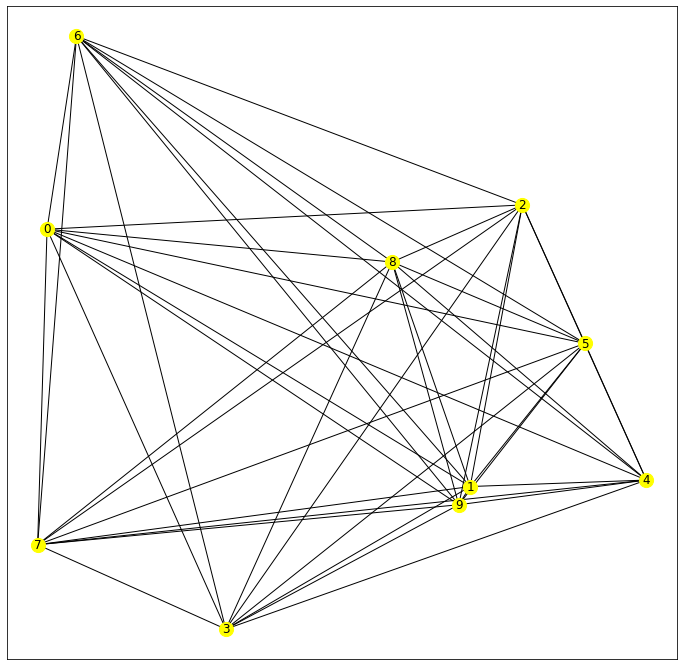

In [6]:
pre_tour = [i for i in C]
pre_tour
G = nx.Graph()
for v in C:
    G.add_node(v)
for i, ci in enumerate(C):
    for j, cj in enumerate(C):
        if i < j:
            G.add_edge(ci,cj, weight=distance(C[ci], C[cj]))
import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))
nx.draw_networkx(G,pos=C,node_color="yellow",node_size=200,with_labels=True,edge_color="k",width=1,axis="equal")
plt.show() 

複数にすると、既に出たやつばっかりになっちゃうからよろしくない

In [7]:
d = {0:"a", 2:"b"}
list(d.keys())

[0, 2]

In [8]:
for u in G[0]:
    print(u)

1
2
3
4
5
6
7
8
9


In [20]:
a = [i for i in range(5)]
print(a)
a[:3]

[0, 1, 2, 3, 4]


[0, 1, 2]

In [17]:
u = 0
d = [G[v][u] for u in G[v]]
d

[{'weight': 6708.197522434771},
 {'weight': 3518.5043697571273},
 {'weight': 7539.573728003461},
 {'weight': 5184.7530317267765},
 {'weight': 6038.150875889075},
 {'weight': 9653.128249432926},
 {'weight': 2464.018871680978},
 {'weight': 6164.778990361293},
 {'weight': 3236.714383445039}]

In [31]:
# start = random.randint(0,n)

def decide_u(v, visited):
    max = 10**8
    d = [G[v][u]["weight"] for u in G[v]]
    d = []
    for u in G[v]:
        if u not in visited:
            d.append(G[v][u]["weight"])
        else:
            d.append(max)
    # index合わせるために現在いる都市にマックスを追加
    d.insert(v, max)
    sort_d = sorted(d)[:3]
    choice = sort_d[random.randint(0,2)]
    u = d.index(choice)
    return u

import time
start = 0
tour = [start]
visited = {start:True}
while len(tour) < len(C):
    v = tour[-1]
    random_min_u = decide_u(v, visited)
    print()
    if random_min_u not in visited:
        visited[random_min_u] = True
        tour.append(random_min_u)
tour

[0, 7, 9, 1, 4, 5, 3, 2, 8, 6]

In [ ]:
def decide_u(v):
    d = [G[v][u]["weight"] for u in G[v]]
    sort_d = sorted(d)[:4]
    choice = sort_d[random.randint(0,2)]
    u = d.index(choice)
    return u

In [ ]:
d = [G[v][u]["weight"] for u in G[v]]
print(sorted(d))
print(len(d))
sort_d = sorted(d)[:3]
print(sort_d)
choice = sort_d[random.randint(0,2)]
random.randint(0,2)

[3167.761512487959, 3904.2709946928635, 5923.0709940030265, 7992.310116605837, 7995.840981410273, 8578.004546513133, 10357.368874381176, 11293.25763453575, 12900.740598895864]
9
[3167.761512487959, 3904.2709946928635, 5923.0709940030265]


2

In [ ]:
|l = sorted([G[v][u] for u in G[v]], key=labmda x:x[1])
l

SyntaxError: ignored

In [ ]:
d = [G[v][u]["weight"] for u in G[v]]
sort_d = sorted([G[v][u]["weight"] for u in G[v]])[:3]
choice = sort_d[0]
u = d.index(choice)

[3099.778217873014, 6000.798780162521, 5931.459854032563, 6347.630266485281, 7764.652278112652, 142.3411395205195, 3861.9265917414846, 7165.789349401781, 4231.959357082721]
142.3411395205195
5


In [ ]:
sort_d

[142.3411395205195, 3099.778217873014, 3861.9265917414846]